<a href="https://colab.research.google.com/github/Parkseojin2001/Deep-learning_with_Python/blob/main/chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.1 일반화: 머신 러닝의 목표

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.keras.backend.set_floatx('float16')

In [3]:
# MNIST에 백색 잡음 픽셀과 0픽셀 추가하기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
# 백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.6177 - accuracy: 0.8120 - val_loss: 0.2891 - val_accuracy: 0.9126
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2690 - accuracy: 0.9307 - val_loss: 0.1943 - val_accuracy: 0.9453
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1787 - accuracy: 0.9653 - val_loss: 0.1824 - val_accuracy: 0.9482
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1285 - accuracy: 0.9805 - val_loss: 0.1472 - val_accuracy: 0.9561
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0963 - accuracy: 0.9878 - val_loss: 0.1305 - val_accuracy: 0.9634
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0732 - accuracy: 0.9941 - val_loss: 0.1227 - val_accuracy: 0.9668
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0554 - accuracy: 0.9951 - val_loss: 0.1227 - val_accuracy: 0.9653
Epoch 

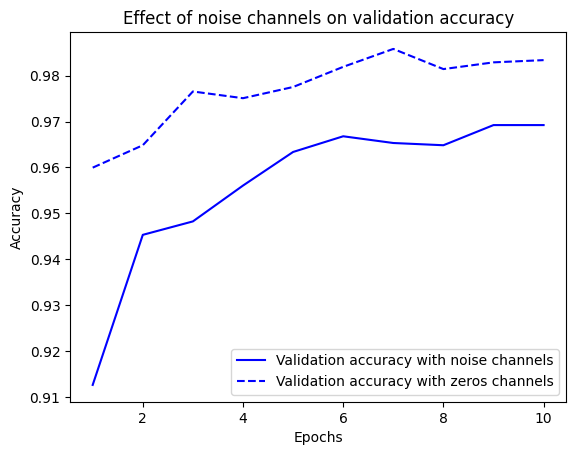

In [6]:
# 검증 정확도 비교 그래프 그리기

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
# 랜덤하게 섞은 레이블로 MNIST 모델 훈련하기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1063 - val_loss: 2.2930 - val_accuracy: 0.1070
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1171 - val_loss: 2.3086 - val_accuracy: 0.1083
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1268 - val_loss: 2.3301 - val_accuracy: 0.1017
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.1359 - val_loss: 2.3145 - val_accuracy: 0.0996
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1482 - val_loss: 2.3379 - val_accuracy: 0.1061
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1591 - val_loss: 2.3496 - val_accuracy: 0.1027
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1740 - val_loss: 2.3574 - val_accuracy: 0.1035
Epoch 8/100
375/375 

### 5.3.3 모델 용량 늘리기

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [9]:
# MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델

model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
								loss="sparse_categorical_crossentropy",
								metrics=["accuracy"])
history_small_model = model.fit(
		train_images, train_labels,
		epochs=20,
		batch_size=128,
		validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6602 - accuracy: 0.8428 - val_loss: 0.3623 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.9087 - val_loss: 0.3110 - val_accuracy: 0.9141
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3196 - accuracy: 0.9180 - val_loss: 0.2922 - val_accuracy: 0.9194
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.9268 - val_loss: 0.2837 - val_accuracy: 0.9214
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2935 - accuracy: 0.9307 - val_loss: 0.2803 - val_accuracy: 0.9229
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2869 - accuracy: 0.9307 - val_loss: 0.2749 - val_accuracy: 0.9238
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2820 - accuracy: 0.9360 - val_loss: 0.2729 - val_accuracy: 0.9238
Epoch 

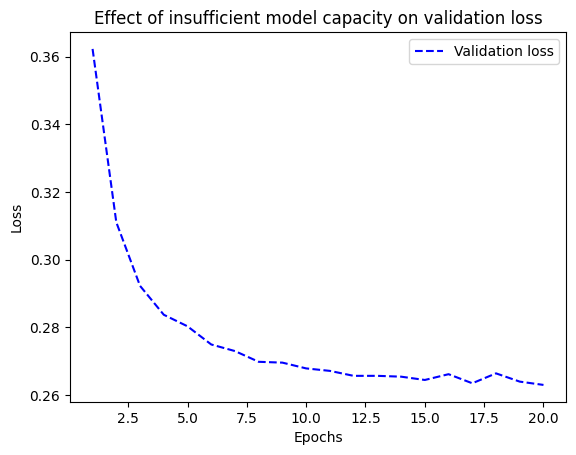

In [10]:
# 손실 곡선
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
# 용량이 큰 모델(층 추가)

model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs = 20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 4s 6ms/step - loss: 0.3684 - accuracy: 0.9058 - val_loss: 0.1910 - val_accuracy: 0.9438
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1720 - accuracy: 0.9688 - val_loss: 0.1370 - val_accuracy: 0.9619
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1223 - accuracy: 0.9829 - val_loss: 0.1091 - val_accuracy: 0.9707
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0941 - accuracy: 0.9888 - val_loss: 0.1088 - val_accuracy: 0.9702
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9932 - val_loss: 0.0928 - val_accuracy: 0.9731
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0623 - accuracy: 0.9946 - val_loss: 0.1046 - val_accuracy: 0.9727
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0522 - accuracy: 0.9966 - val_loss: 0.0988 - val_accuracy: 0.9746
Epoch 

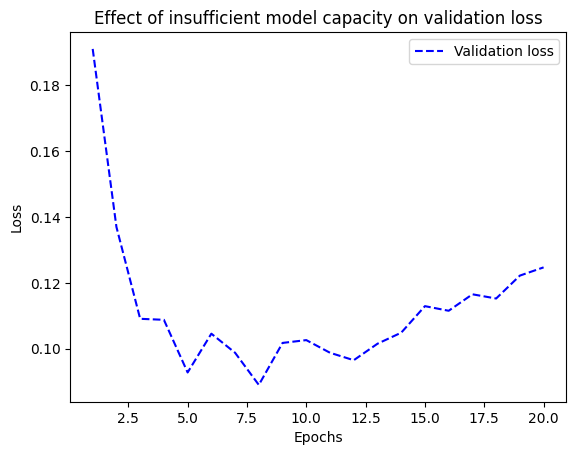

In [12]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 5.4.4 모델 규제하기

In [13]:
from tensorflow.keras.datasets import imdb

In [14]:
# 가장 자주 나타나는 단어 개수 = 10000
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

In [16]:
# 원본 모델

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5566 - accuracy: 0.7783 - val_loss: 0.4392 - val_accuracy: 0.8496
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3633 - accuracy: 0.8833 - val_loss: 0.3347 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2739 - accuracy: 0.9062 - val_loss: 0.2983 - val_accuracy: 0.8848
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2246 - accuracy: 0.9248 - val_loss: 0.2798 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1899 - accuracy: 0.9360 - val_loss: 0.2771 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1653 - accuracy: 0.9443 - val_loss: 0.3083 - val_accuracy: 0.8735
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1447 - accuracy: 0.9531 - val_loss: 0.2986 - val_accuracy: 0.8823
Epoch 8/20
30

In [17]:
# 작은 용량의 모델

model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 105ms/step - loss: 0.5767 - accuracy: 0.7505 - val_loss: 0.4692 - val_accuracy: 0.8560
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3965 - accuracy: 0.8867 - val_loss: 0.3718 - val_accuracy: 0.8774
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3042 - accuracy: 0.9165 - val_loss: 0.3242 - val_accuracy: 0.8823
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2485 - accuracy: 0.9258 - val_loss: 0.2954 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2101 - accuracy: 0.9399 - val_loss: 0.2827 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1832 - accuracy: 0.9458 - val_loss: 0.2803 - val_accuracy: 0.8887
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1605 - accuracy: 0.9541 - val_loss: 0.2888 - val_accuracy: 0.8848
Epoch 8/20
3

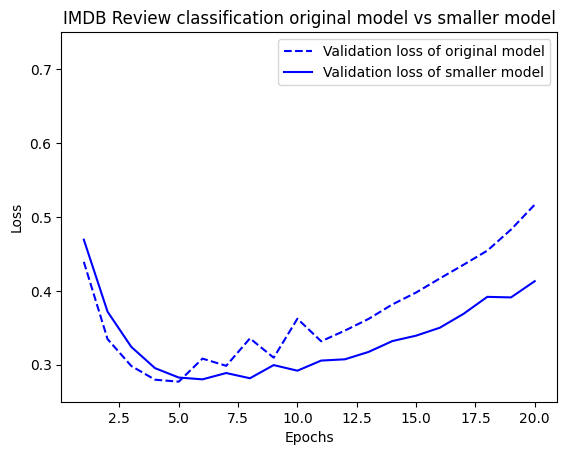

In [18]:
val_original = history_original.history["val_loss"]
val_smaller = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_smaller, "b-",
         label="Validation loss of smaller model")
plt.title("IMDB Review classification original model vs smaller model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.25, 0.75])
plt.legend()
plt.show()

In [19]:
# 큰 용량의 모델

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 103ms/step - loss: 0.5747 - accuracy: 0.7339 - val_loss: 0.3320 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3235 - accuracy: 0.8657 - val_loss: 0.3257 - val_accuracy: 0.8599
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2416 - accuracy: 0.9038 - val_loss: 0.2898 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1820 - accuracy: 0.9326 - val_loss: 0.2969 - val_accuracy: 0.8794
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1515 - accuracy: 0.9438 - val_loss: 0.3203 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1405 - accuracy: 0.9492 - val_loss: 0.2871 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0859 - accuracy: 0.9727 - val_loss: 0.3354 - val_accuracy: 0.8833
Epoch 8/20
3

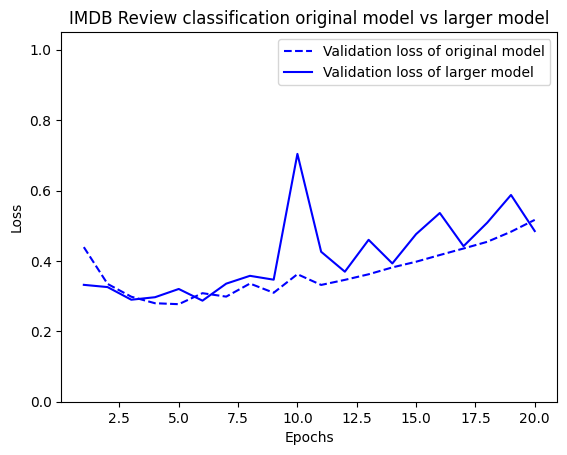

In [20]:
val_original = history_original.history["val_loss"]
val_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_larger, "b-",
         label="Validation loss of larger model")
plt.title("IMDB Review classification original model vs larger model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0, 1.05])
plt.legend()
plt.show()

#### 가중치 규제 추가

In [21]:
# 모델에 L2 가중치 추가하기
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6187 - accuracy: 0.7808 - val_loss: 0.4856 - val_accuracy: 0.8633
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4155 - accuracy: 0.8887 - val_loss: 0.3972 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3413 - accuracy: 0.9131 - val_loss: 0.3750 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3047 - accuracy: 0.9209 - val_loss: 0.3645 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2791 - accuracy: 0.9326 - val_loss: 0.3577 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2627 - accuracy: 0.9380 - val_loss: 0.3579 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2563 - accuracy: 0.9385 - val_loss: 0.3701 - val_accuracy: 0.8823
Epoch 8/20
30

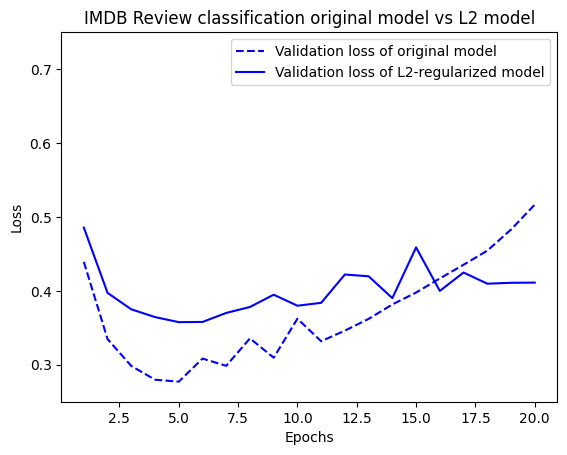

In [22]:
val_original = history_original.history["val_loss"]
val_l2 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_l2, "b-",
         label="Validation loss of L2-regularized model")
plt.title("IMDB Review classification original model vs L2 model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.25, 0.75])
plt.legend()
plt.show()

#### 드롭아웃

In [23]:
# IMDB 모델에 드롭아웃 추가하기
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 83ms/step - loss: 0.6572 - accuracy: 0.5991 - val_loss: 0.5762 - val_accuracy: 0.8306
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5483 - accuracy: 0.7344 - val_loss: 0.4419 - val_accuracy: 0.8657
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4604 - accuracy: 0.8037 - val_loss: 0.3757 - val_accuracy: 0.8784
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3987 - accuracy: 0.8428 - val_loss: 0.3237 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3430 - accuracy: 0.8730 - val_loss: 0.2961 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3008 - accuracy: 0.8940 - val_loss: 0.2786 - val_accuracy: 0.8896
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2656 - accuracy: 0.9102 - val_loss: 0.2798 - val_accuracy: 0.8857
Epoch 8/20
30

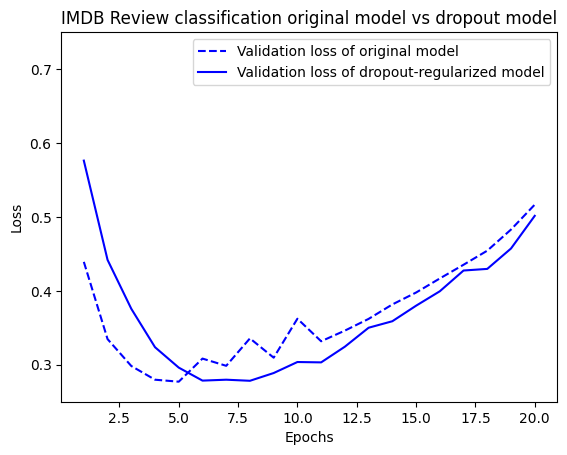

In [24]:
val_original = history_original.history["val_loss"]
val_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_dropout, "b-",
         label="Validation loss of dropout-regularized model")
plt.title("IMDB Review classification original model vs dropout model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.25, 0.75])
plt.legend()
plt.show()